# Import libraries

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt
import warnings
warnings.filterwarnings("ignore")

In [2]:

# code to save the figures as high-res PNGs
import os
from pathlib import Path
from matplotlib import pyplot as plt

IMAGES_PATH = Path() / "Solar-Images"
IMAGES_PATH.mkdir(parents=True, exist_ok=True)

def save_fig(fig_id, tight_layout=True, fig_extension="png", resolution=300):
    path = IMAGES_PATH / f"{fig_id}.{fig_extension}"
    if tight_layout:
        plt.tight_layout()
    plt.savefig(path, format=fig_extension, dpi=resolution)

# Load Dataset

In [3]:
# Load the dataset
df = pd.read_csv("solar_power.csv")

In [4]:
df.head()

temperature_2_m_above_gnd  relative_humidity_2_m_above_gnd  \
0                       2.17                               31   
1                       2.31                               27   
2                       3.65                               33   
3                       5.82                               30   
4                       7.73                               27   

   mean_sea_level_pressure_MSL  total_precipitation_sfc  snowfall_amount_sfc  \
0                       1035.0                      0.0                  0.0   
1                       1035.1                      0.0                  0.0   
2                       1035.4                      0.0                  0.0   
3                       1035.4                      0.0                  0.0   
4                       1034.4                      0.0                  0.0   

   total_cloud_cover_sfc  high_cloud_cover_high_cld_lay  \
0                    0.0                              0   
1                    0.0                              0   
2                    0.0                              0   
3                    0.0                              0   
4                    0.0                              0   

   medium_cloud_cover_mid_cld_lay  low_cloud_cover_low_cld_lay  \
0                               0                            0   
1                               0                            0   
2                               0                            0   
3                               0                            0   
4                               0                            0   

   shortwave_radiation_backwards_sfc  ...  wind_direction_10_m_above_gnd  \
0                               0.00  ...                         312.71   
1                               1.78  ...                         294.78   
2                             108.58  ...                         270.00   
3                             258.10  ...                         323.13   
4                             375.58  ...                          10.01   

   irradiance  wind_direction_80_m_above_gnd  wind_speed_900_mb  \
0        9.36                          22.62               6.62   
1        5.99                          32.74               4.61   
2        3.89                          56.31               3.76   
3        3.55                          23.96               3.08   
4        6.76                          25.20               6.62   

   wind_direction_900_mb  panel_efficiency  angle_of_incidence  panel_area  \
0                 337.62             24.48           58.753108   83.237322   
1                 321.34             21.96           45.408585   75.143041   
2                 286.70             14.04           32.848282   68.820648   
3                 339.44             19.80           22.699288   64.883536   
4                  22.38             16.56           19.199908   63.795208   

     azimuth  generated_power_kw  
0  128.33543           454.10095  
1  139.65530          1411.99940  
2  152.53769          2214.84930  
3  166.90159          2527.60920  
4  182.13526          2640.20340  

[5 rows x 21 columns]

In [5]:
# Details info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4213 entries, 0 to 4212
Data columns (total 21 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   temperature_2_m_above_gnd          4213 non-null   float64
 1   relative_humidity_2_m_above_gnd    4213 non-null   int64  
 2   mean_sea_level_pressure_MSL        4213 non-null   float64
 3   total_precipitation_sfc            4213 non-null   float64
 4   snowfall_amount_sfc                4213 non-null   float64
 5   total_cloud_cover_sfc              4213 non-null   float64
 6   high_cloud_cover_high_cld_lay      4213 non-null   int64  
 7   medium_cloud_cover_mid_cld_lay     4213 non-null   int64  
 8   low_cloud_cover_low_cld_lay        4213 non-null   int64  
 9   shortwave_radiation_backwards_sfc  4213 non-null   float64
 10  wind_speed_10_m_above_gnd          4213 non-null   float64
 11  wind_direction_10_m_above_gnd      4213 non-null   float

In [6]:
df.describe()

temperature_2_m_above_gnd  relative_humidity_2_m_above_gnd  \
count                4213.000000                      4213.000000   
mean                   15.068111                        51.361025   
std                     8.853677                        23.525864   
min                    -5.350000                         7.000000   
25%                     8.390000                        32.000000   
50%                    14.750000                        48.000000   
75%                    21.290000                        70.000000   
max                    34.900000                       100.000000   

       mean_sea_level_pressure_MSL  total_precipitation_sfc  \
count                  4213.000000              4213.000000   
mean                   1019.337812                 0.031759   
std                       7.022867                 0.170212   
min                     997.500000                 0.000000   
25%                    1014.500000                 0.000000   
50%                    1018.100000                 0.000000   
75%                    1023.600000                 0.000000   
max                    1046.800000                 3.200000   

       snowfall_amount_sfc  total_cloud_cover_sfc  \
count          4213.000000            4213.000000   
mean              0.002808              34.056990   
std               0.038015              42.843638   
min               0.000000               0.000000   
25%               0.000000               0.000000   
50%               0.000000               8.700000   
75%               0.000000             100.000000   
max               1.680000             100.000000   

       high_cloud_cover_high_cld_lay  medium_cloud_cover_mid_cld_lay  \
count                    4213.000000                     4213.000000   
mean                       14.458818                       20.023499   
std                        30.711707                       36.387948   
min                         0.000000                        0.000000   
25%                         0.000000                        0.000000   
50%                         0.000000                        0.000000   
75%                         9.000000                       10.000000   
max                       100.000000                      100.000000   

       low_cloud_cover_low_cld_lay  shortwave_radiation_backwards_sfc  ...  \
count                  4213.000000                        4213.000000  ...   
mean                     21.373368                         387.759036  ...   
std                      38.013885                         278.459293  ...   
min                       0.000000                           0.000000  ...   
25%                       0.000000                         142.400000  ...   
50%                       0.000000                         381.810000  ...   
75%                      10.000000                         599.860000  ...   
max                     100.000000                         952.300000  ...   

       wind_direction_10_m_above_gnd   irradiance  \
count                    4213.000000  4213.000000   
mean                      195.078452    18.978483   
std                       106.626782    11.999960   
min                         0.540000     0.000000   
25%                       153.190000    10.140000   
50%                       191.770000    16.240000   
75%                       292.070000    26.140000   
max                       360.000000    66.880000   

       wind_direction_80_m_above_gnd  wind_speed_900_mb  \
count                    4213.000000         4213.00000   
mean                      191.166862           16.36319   
std                       108.760021            9.88533   
min                         1.120000            0.00000   
25%                       130.240000            9.18000   
50%                       187.770000           14.49000   
75%                       292.040000           21.97000   
max                       360.000000 

In [7]:
# Check the number of missing values in each column
missing_values = df.isnull().sum()
print(missing_values)

# Calculate the percentage of missing values in each column
missing_percentage = (df.isnull().sum() / len(df)) * 100
print(missing_percentage)

temperature_2_m_above_gnd            0
relative_humidity_2_m_above_gnd      0
mean_sea_level_pressure_MSL          0
total_precipitation_sfc              0
snowfall_amount_sfc                  0
total_cloud_cover_sfc                0
high_cloud_cover_high_cld_lay        0
medium_cloud_cover_mid_cld_lay       0
low_cloud_cover_low_cld_lay          0
shortwave_radiation_backwards_sfc    0
wind_speed_10_m_above_gnd            0
wind_direction_10_m_above_gnd        0
irradiance                           0
wind_direction_80_m_above_gnd        0
wind_speed_900_mb                    0
wind_direction_900_mb                0
panel_efficiency                     0
angle_of_incidence                   0
panel_area                           0
azimuth                              0
generated_power_kw                   0
dtype: int64
temperature_2_m_above_gnd            0.0
relative_humidity_2_m_above_gnd      0.0
mean_sea_level_pressure_MSL          0.0
total_precipitation_sfc              0.0
snow

# Correlation Matrix

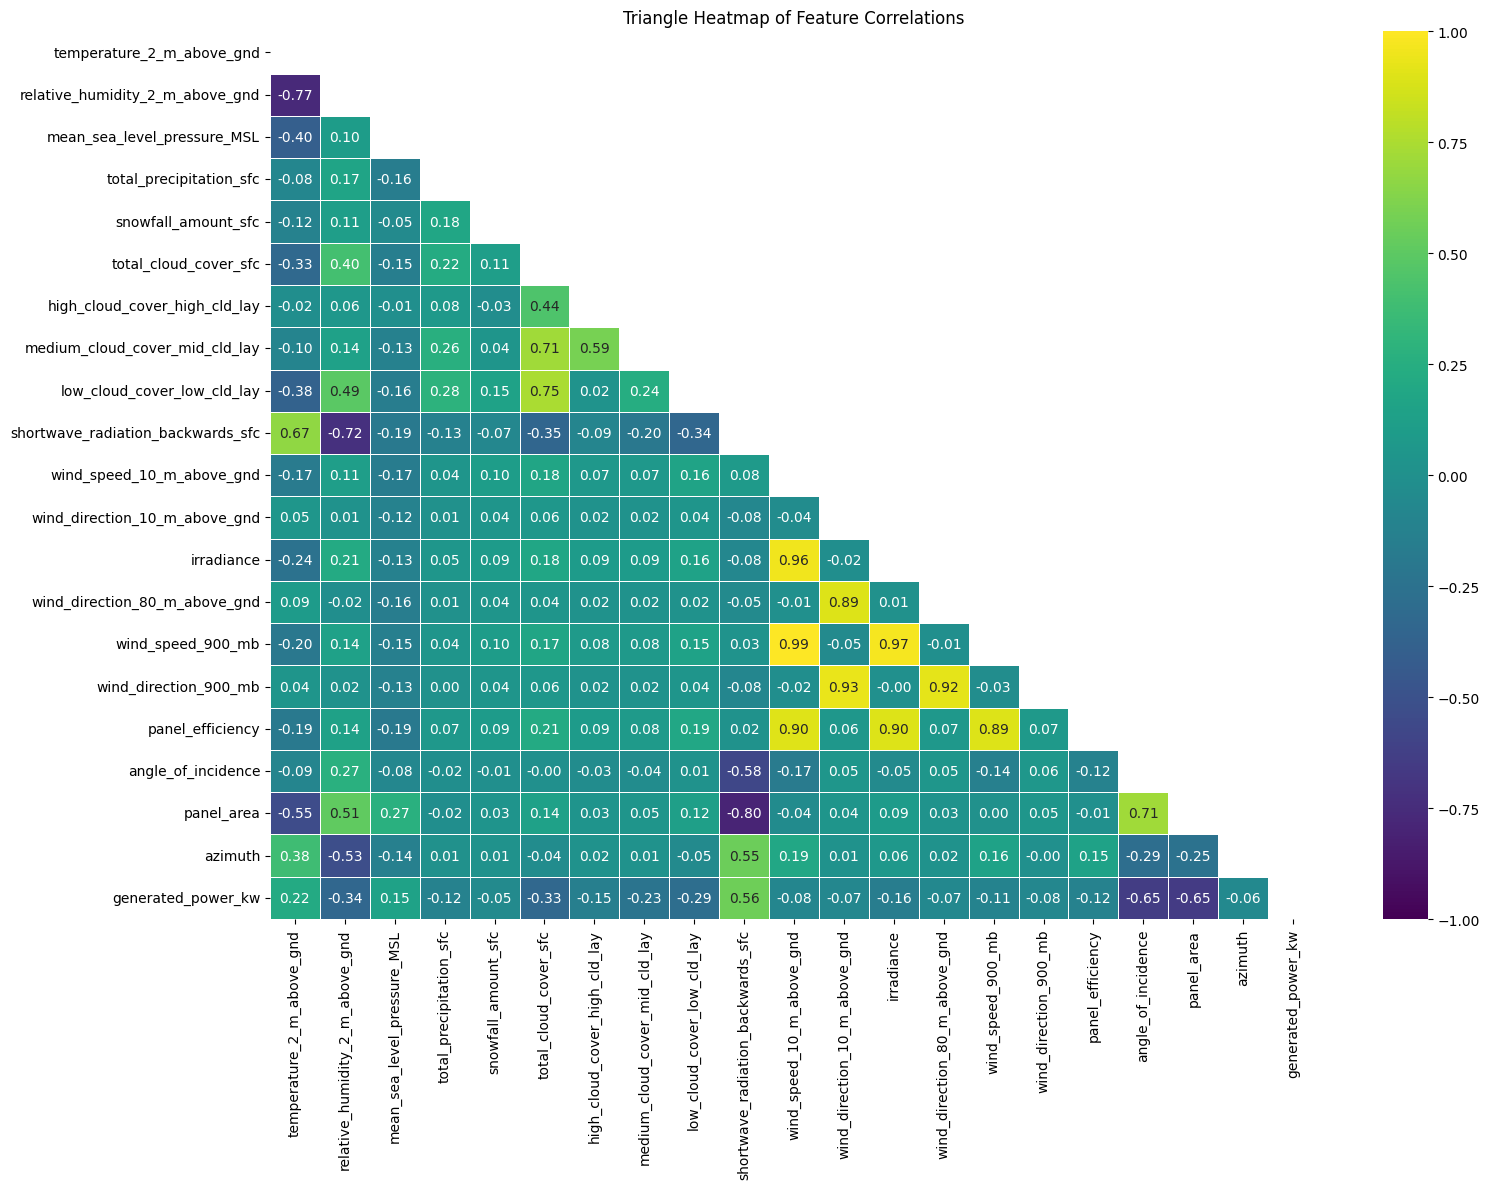

In [8]:
# Select only numerical columns for correlation calculation
numerical_df = df.select_dtypes(include=['number'])

# Calculate the correlation matrix
corr_matrix = numerical_df.corr()

# Create a mask for the upper triangle
mask = np.triu(np.ones_like(corr_matrix, dtype=bool))

# Set up the matplotlib figure
plt.figure(figsize=(16, 12))

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr_matrix, annot=True, fmt=".2f", cmap='viridis', vmin=-1, vmax=1, linewidths=0.5, mask=mask)
plt.title('Triangle Heatmap of Feature Correlations')

save_fig("Triangle Heatmap of Feature Correlations")
plt.show()

# Univariate Analysis for Numerical Features

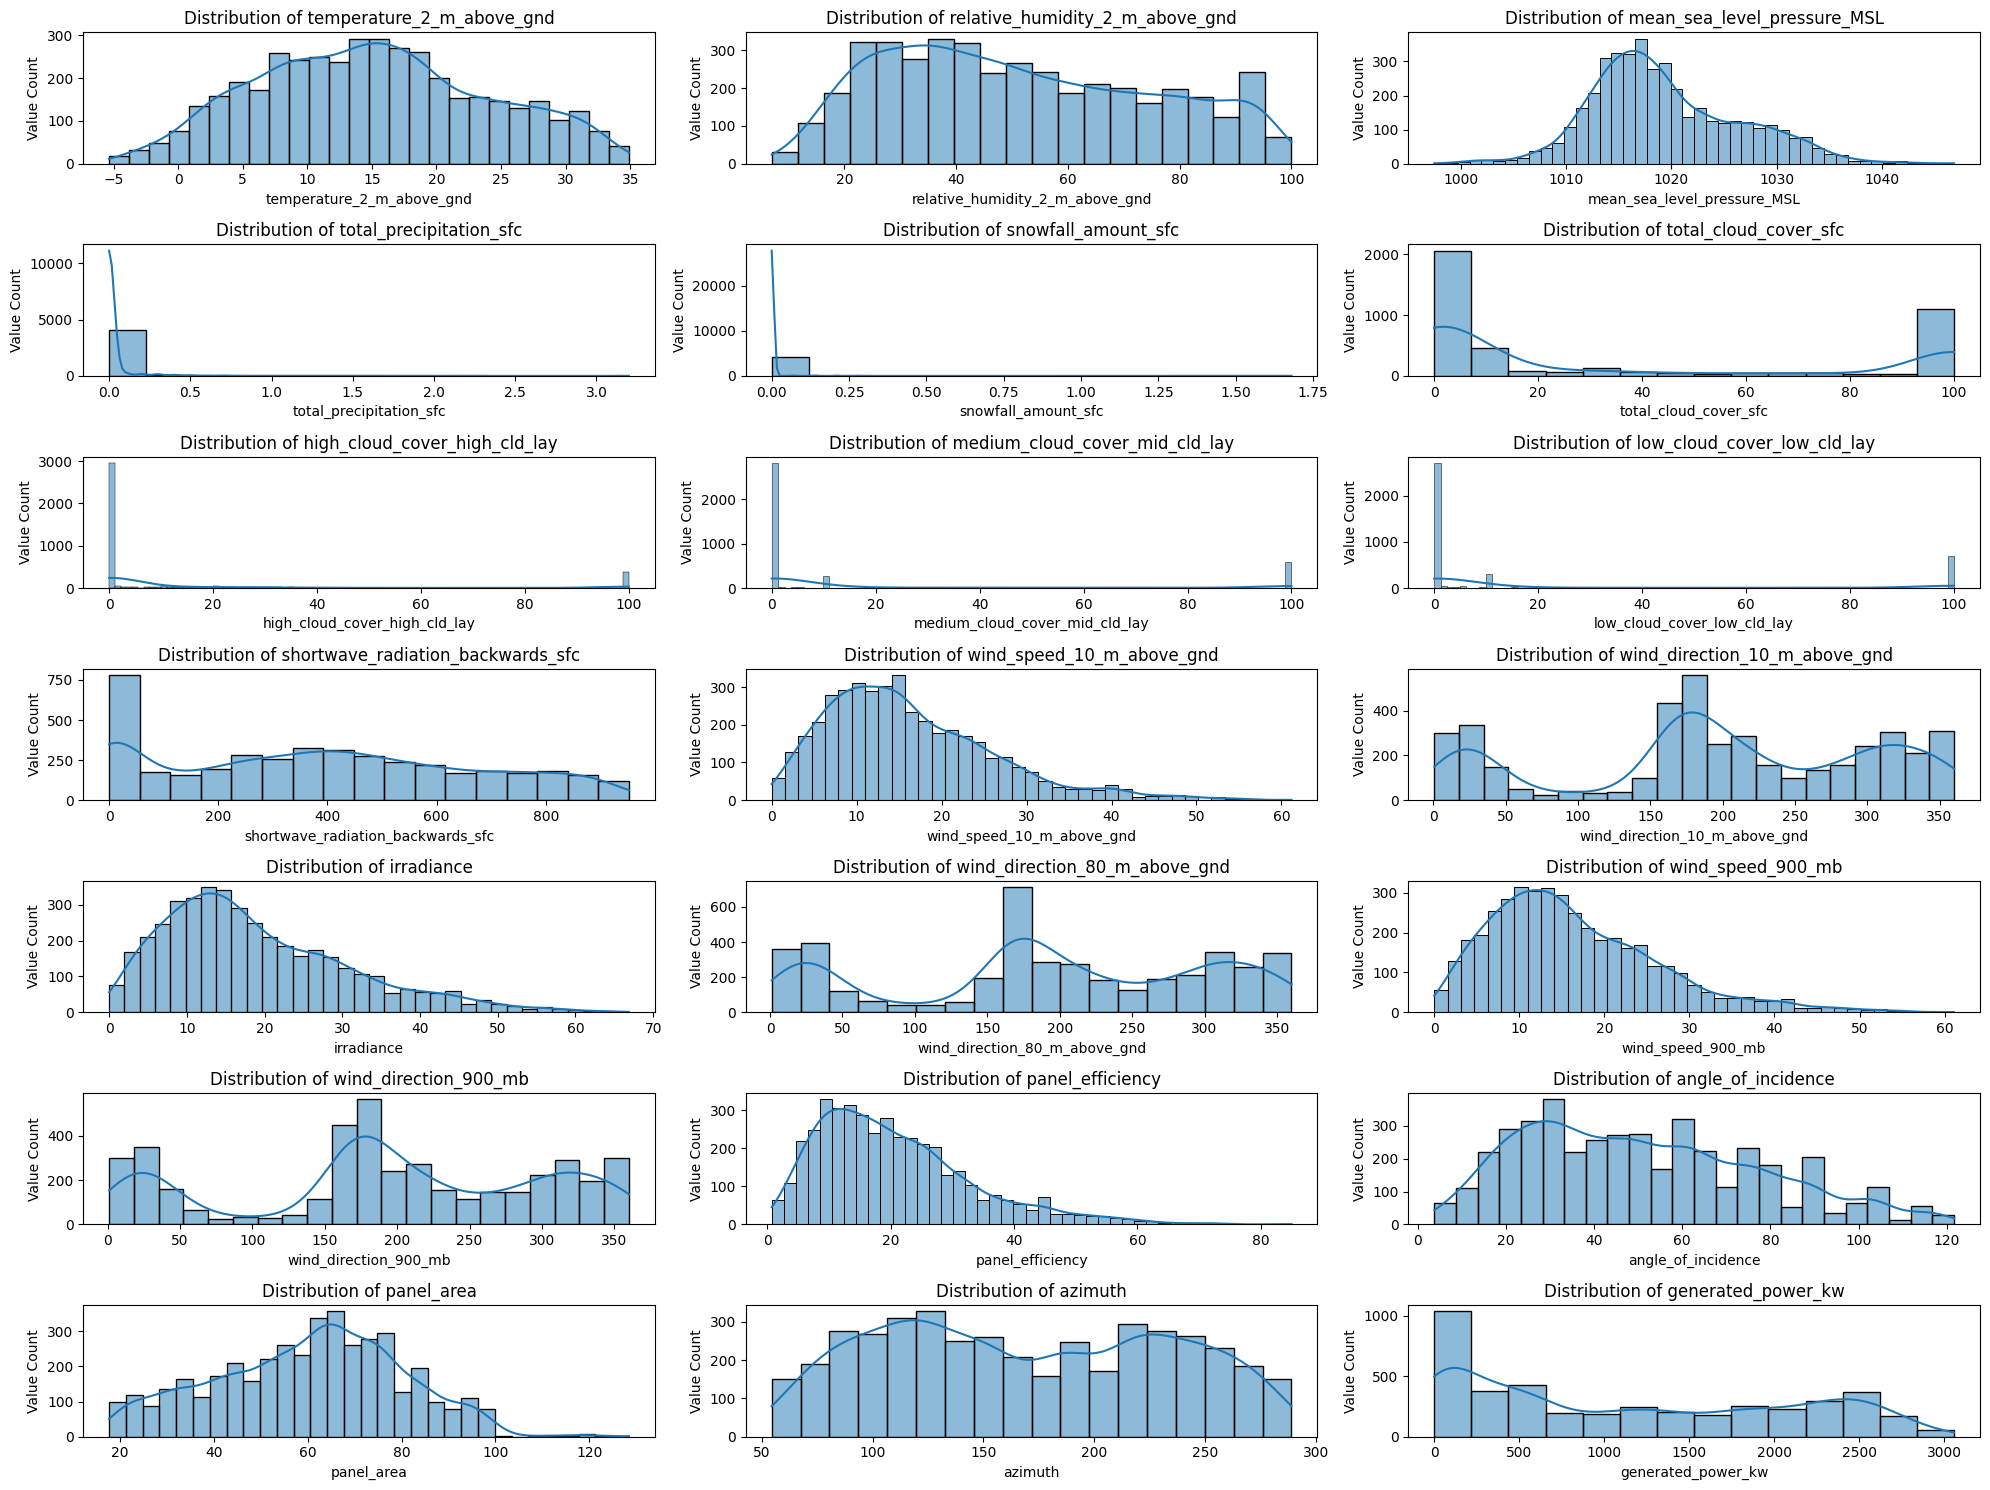

In [9]:
# matplotlib figure
plt.figure(figsize=(20, 15))

# List of numerical features
numerical_features = [
    'temperature_2_m_above_gnd', 'relative_humidity_2_m_above_gnd', 'mean_sea_level_pressure_MSL',
    'total_precipitation_sfc', 'snowfall_amount_sfc', 'total_cloud_cover_sfc',
    'high_cloud_cover_high_cld_lay', 'medium_cloud_cover_mid_cld_lay', 'low_cloud_cover_low_cld_lay',
    'shortwave_radiation_backwards_sfc', 'wind_speed_10_m_above_gnd', 'wind_direction_10_m_above_gnd',
    'irradiance', 'wind_direction_80_m_above_gnd', 'wind_speed_900_mb',
    'wind_direction_900_mb', 'panel_efficiency', 'angle_of_incidence',
    'panel_area', 'azimuth', 'generated_power_kw'
]


for i, feature in enumerate(numerical_features, 1):
    plt.subplot(7, 3, i)
    sns.histplot(df[feature], kde=True)
    plt.title(f'Distribution of {feature}')

    plt.xlabel(feature)
    plt.ylabel('Value Count')

plt.tight_layout()

save_fig("Distribution of Numerical Features")
plt.show()

## Scatter plot between temperature 2m above gnd and generated_power_kw

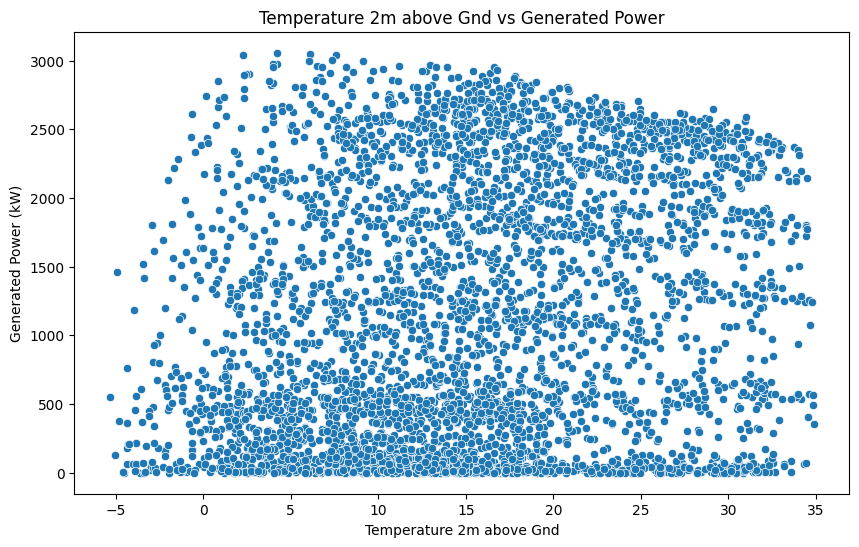

In [10]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x=df['temperature_2_m_above_gnd'], y=df['generated_power_kw'])
plt.title('Temperature 2m above Gnd vs Generated Power')
plt.xlabel('Temperature 2m above Gnd')
plt.ylabel('Generated Power (kW)')
plt.show()

## Scatter plot between Relative Humidity 2M Above Gnd  and Generated Power Kw

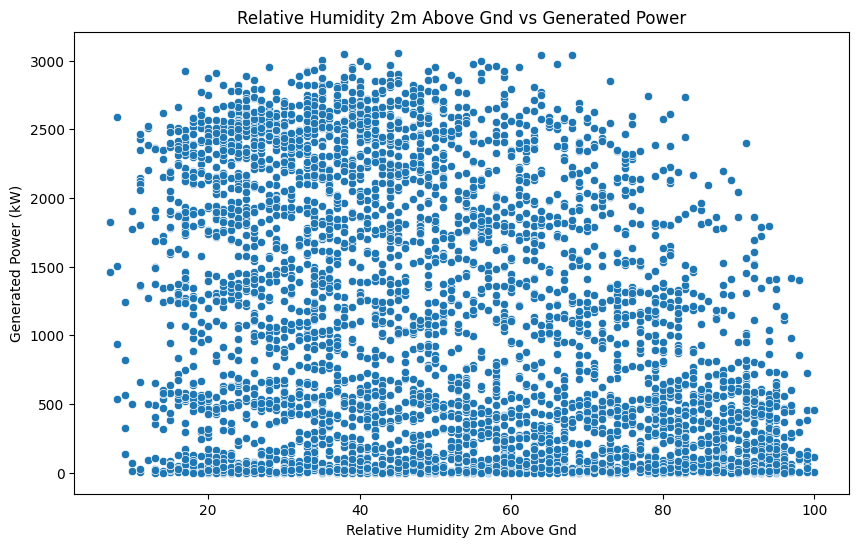

In [11]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x=df['relative_humidity_2_m_above_gnd'], y=df['generated_power_kw'])
plt.title('Relative Humidity 2m Above Gnd vs Generated Power')
plt.xlabel('Relative Humidity 2m Above Gnd')
plt.ylabel('Generated Power (kW)')
plt.show()

## Scatter plot between Mean sea level Pressure MSL and Generated Power kw

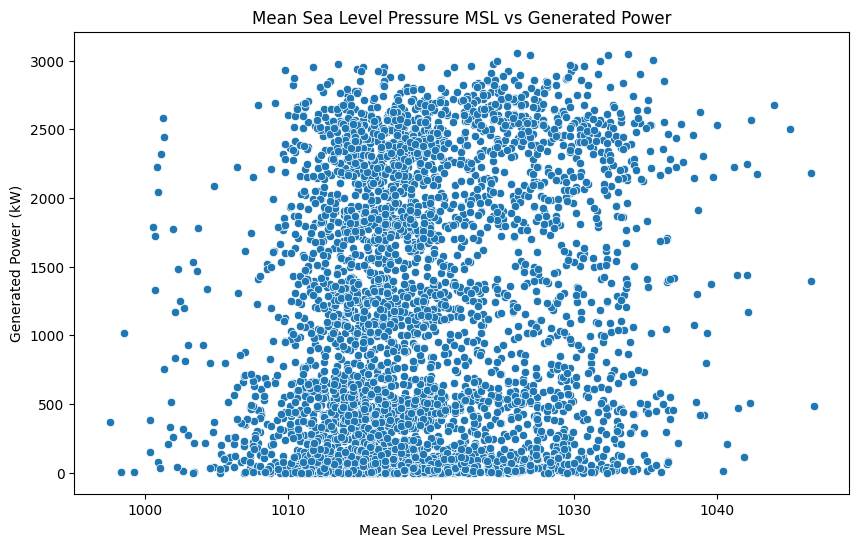

In [12]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x=df['mean_sea_level_pressure_MSL'], y=df['generated_power_kw'])
plt.title('Mean Sea Level Pressure MSL vs Generated Power')
plt.xlabel('Mean Sea Level Pressure MSL')
plt.ylabel('Generated Power (kW)')
plt.show()

## Scatter plot between Total precipitation Sfc and Generated Power KW

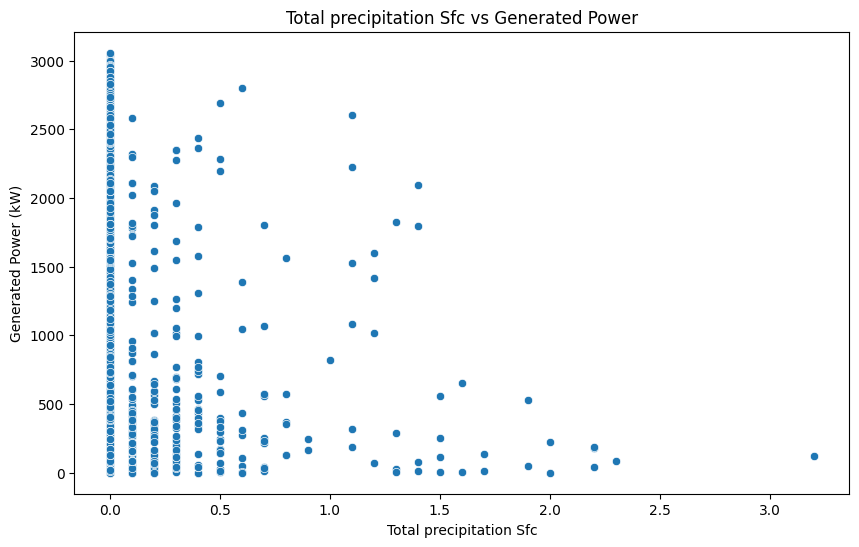

In [13]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x=df['total_precipitation_sfc'], y=df['generated_power_kw'])
plt.title('Total precipitation Sfc vs Generated Power')
plt.xlabel('Total precipitation Sfc')
plt.ylabel('Generated Power (kW)')
plt.show()

## Scatter plot between Snowfall Amount Sfc and Generated Power KW

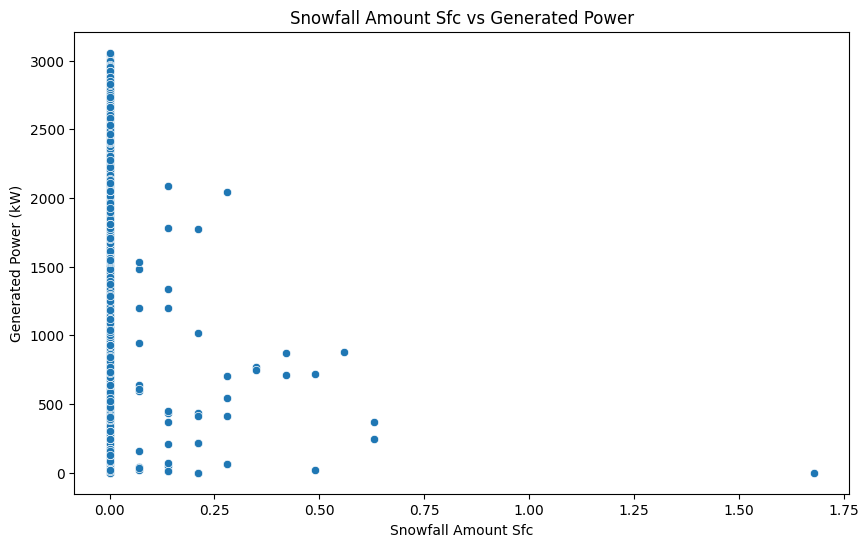

In [14]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x=df['snowfall_amount_sfc'], y=df['generated_power_kw'])
plt.title('Snowfall Amount Sfc vs Generated Power')
plt.xlabel('Snowfall Amount Sfc')
plt.ylabel('Generated Power (kW)')
plt.show()

## Scatter plot between total_cloud_cover_sfc and generated_power_kw

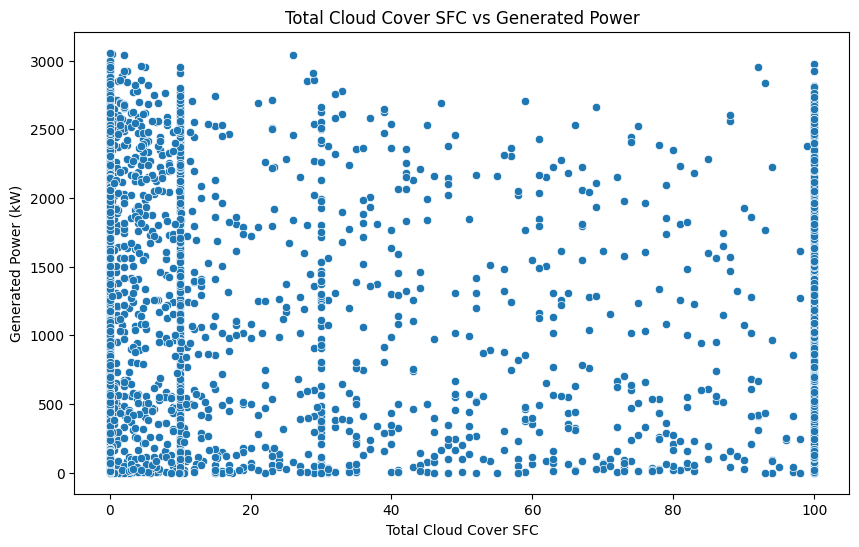

In [15]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x=df['total_cloud_cover_sfc'], y=df['generated_power_kw'])
plt.title('Total Cloud Cover SFC vs Generated Power')
plt.xlabel('Total Cloud Cover SFC')
plt.ylabel('Generated Power (kW)')
plt.show()

## Scatter plot between Total Cloud Cover Sfc and Generated Power KW

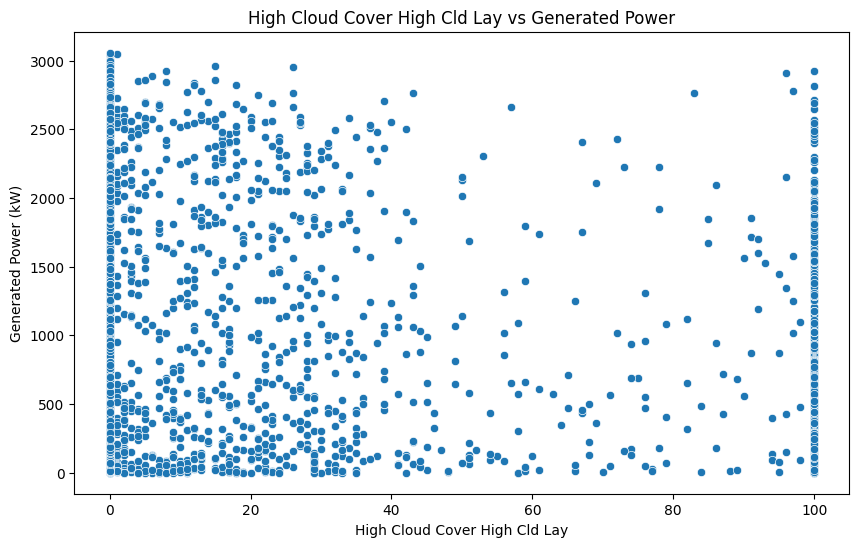

In [16]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x=df['high_cloud_cover_high_cld_lay'], y=df['generated_power_kw'])
plt.title('High Cloud Cover High Cld Lay vs Generated Power')
plt.xlabel('High Cloud Cover High Cld Lay')
plt.ylabel('Generated Power (kW)')
plt.show()

## Scatter plot between Medium cloud cover mid cld lay and Generated Power KW

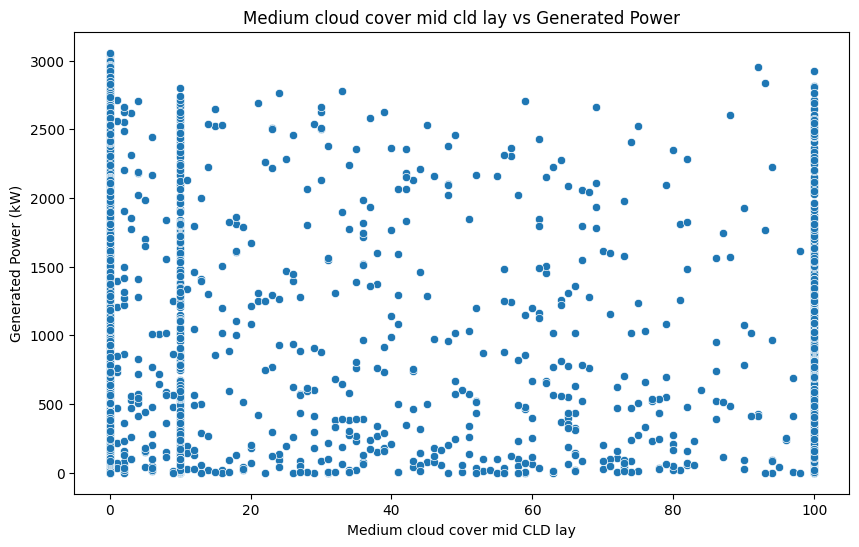

In [17]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x=df['medium_cloud_cover_mid_cld_lay'], y=df['generated_power_kw'])
plt.title('Medium cloud cover mid cld lay vs Generated Power')
plt.xlabel('Medium cloud cover mid CLD lay')
plt.ylabel('Generated Power (kW)')
plt.show()

## Scatter plot between Low Cloud cover low CLD lay  and Generated Power KW

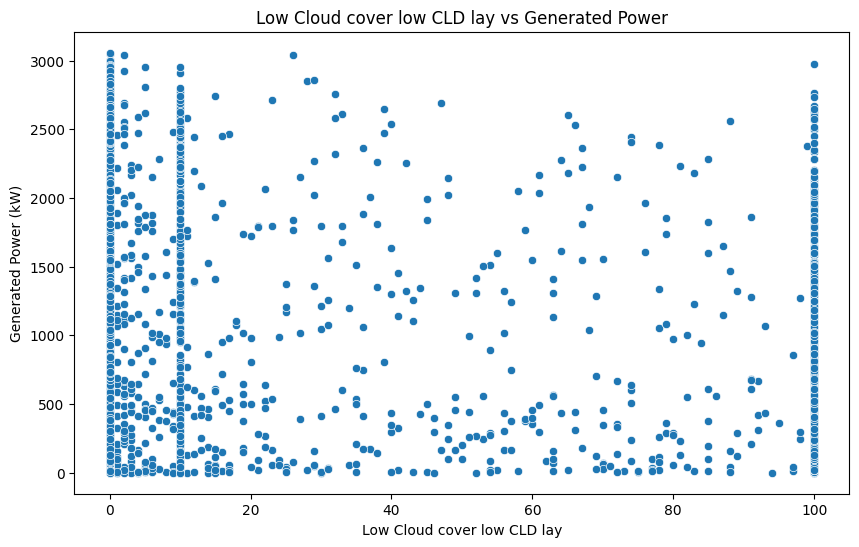

In [18]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x=df['low_cloud_cover_low_cld_lay'], y=df['generated_power_kw'])
plt.title('Low Cloud cover low CLD lay vs Generated Power')
plt.xlabel('Low Cloud cover low CLD lay')
plt.ylabel('Generated Power (kW)')
plt.show()

## Scatter plot between Shortwave Radiation Backwards SFC and Generated Power KW

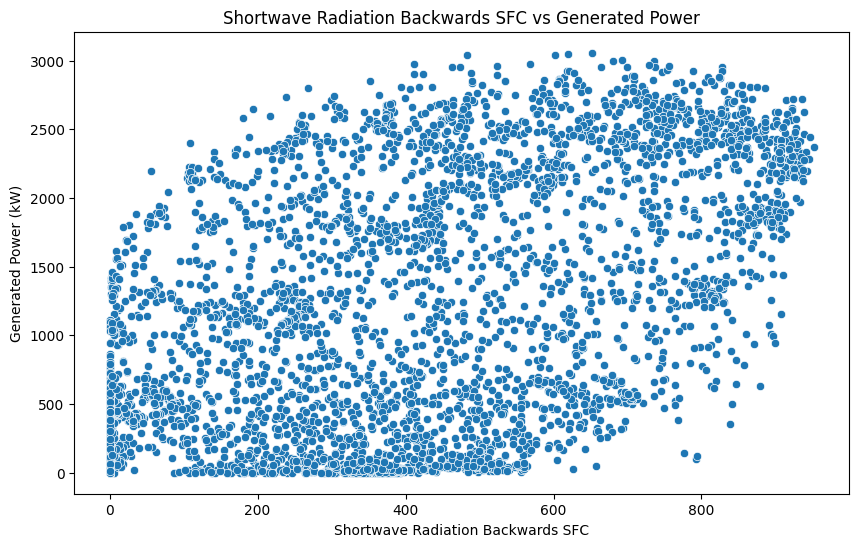

In [19]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x=df['shortwave_radiation_backwards_sfc'], y=df['generated_power_kw'])
plt.title('Shortwave Radiation Backwards SFC vs Generated Power')
plt.xlabel('Shortwave Radiation Backwards SFC')
plt.ylabel('Generated Power (kW)')
plt.show()

## Scatter plot between Wind Speed 10m Above Gnd and Generated Power KW

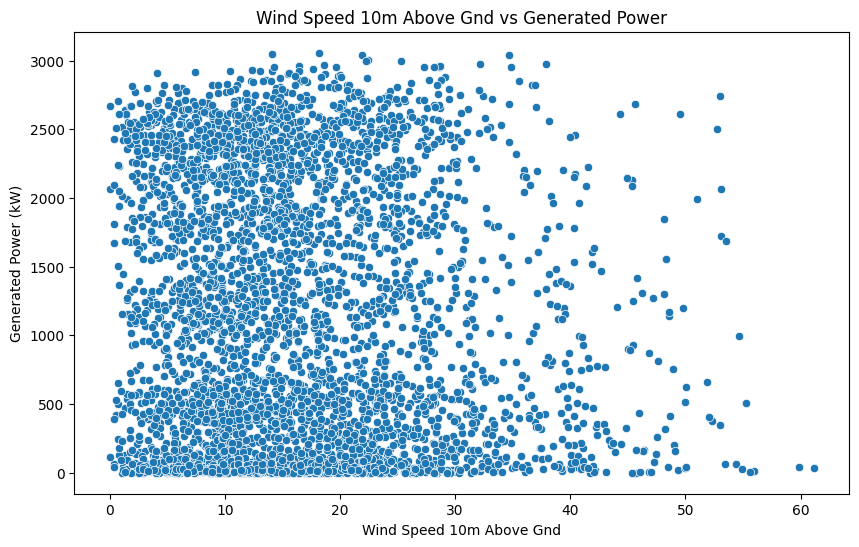

In [20]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x=df['wind_speed_10_m_above_gnd'], y=df['generated_power_kw'])
plt.title('Wind Speed 10m Above Gnd vs Generated Power')
plt.xlabel('Wind Speed 10m Above Gnd')
plt.ylabel('Generated Power (kW)')
plt.show()

## Scatter plot between Wind Direction 10m Above Gnd and Generated Power Kw


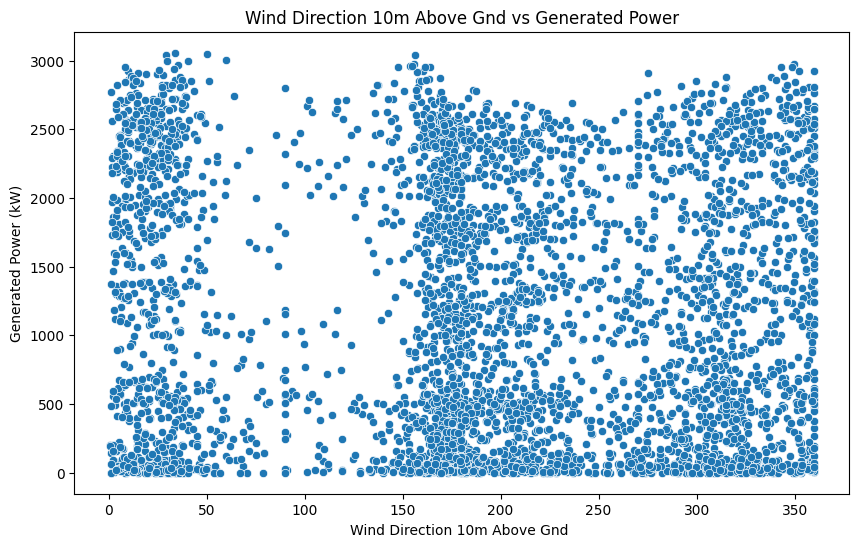

In [21]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x=df['wind_direction_10_m_above_gnd'], y=df['generated_power_kw'])
plt.title('Wind Direction 10m Above Gnd vs Generated Power')
plt.xlabel('Wind Direction 10m Above Gnd ')
plt.ylabel('Generated Power (kW)')
plt.show()

## Scatter plot between Irradiance and Generated Power KW

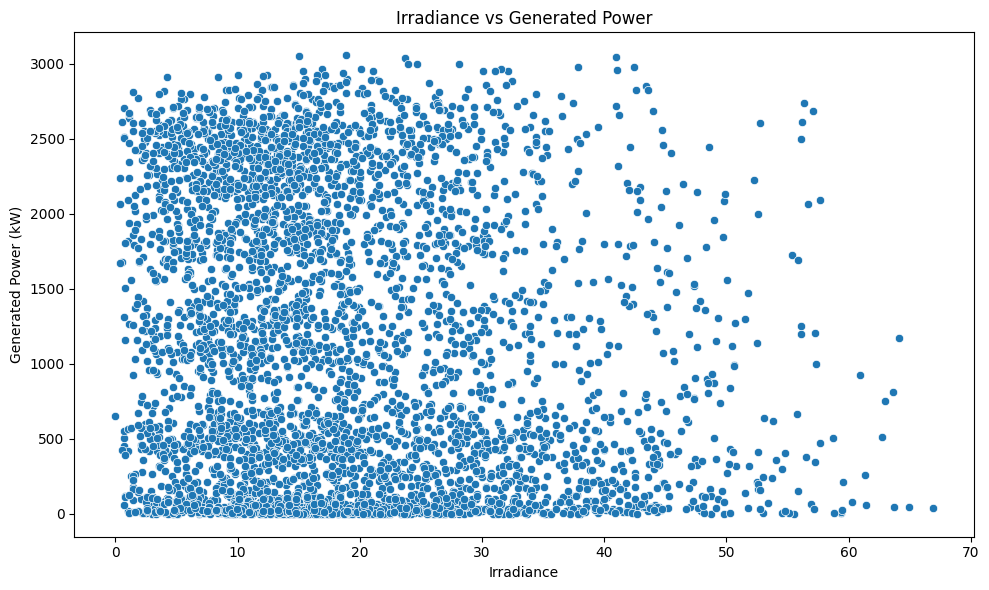

In [22]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x=df['irradiance'], y=df['generated_power_kw'])
plt.title('Irradiance vs Generated Power')
plt.xlabel('Irradiance')
plt.ylabel('Generated Power (kW)')
save_fig("Irradiance vs Generated Power")
plt.show()

## Scatter plot between Wind Direction 80m Above GND and Generated Power Kw



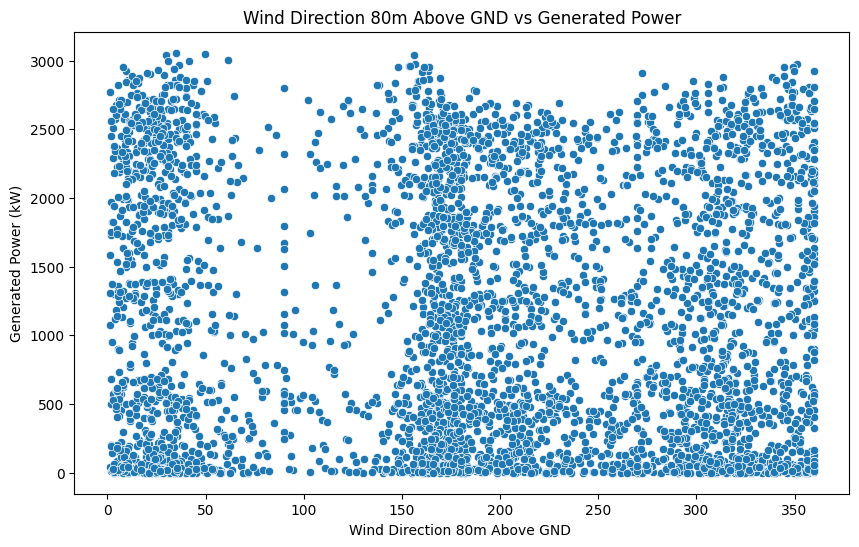

In [23]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x=df['wind_direction_80_m_above_gnd'], y=df['generated_power_kw'])
plt.title('Wind Direction 80m Above GND vs Generated Power')
plt.xlabel('Wind Direction 80m Above GND ')
plt.ylabel('Generated Power (kW)')
plt.show()

## Scatter plot between Wind speed 900mb and Generated Power Kw

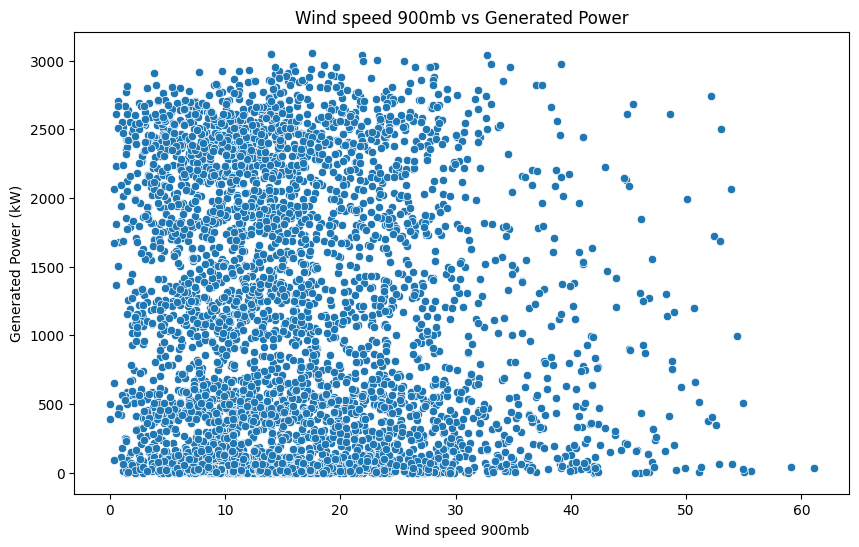

In [24]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x=df['wind_speed_900_mb'], y=df['generated_power_kw'])
plt.title('Wind speed 900mb vs Generated Power')
plt.xlabel('Wind speed 900mb')
plt.ylabel('Generated Power (kW)')
plt.show()

## Scatter plot between Wind direction 900mb and Generated Power Kw

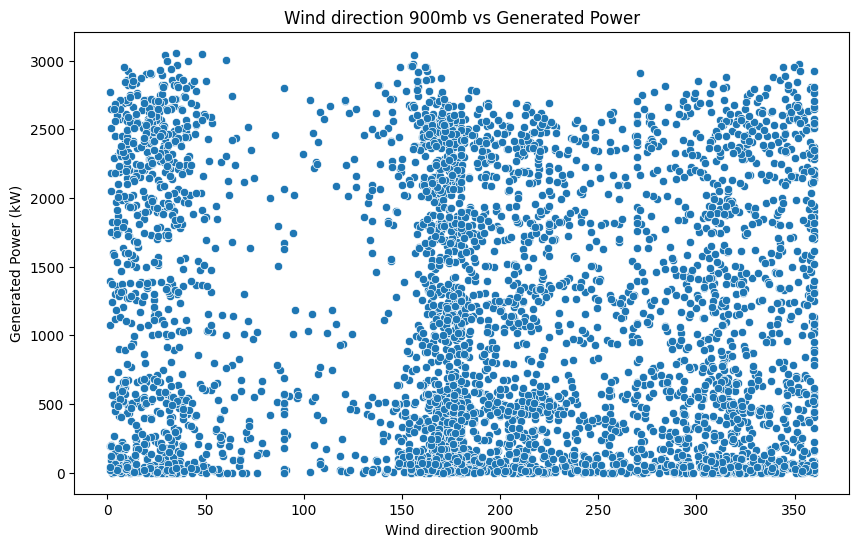

In [25]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x=df['wind_direction_900_mb'], y=df['generated_power_kw'])
plt.title('Wind direction 900mb vs Generated Power')
plt.xlabel('Wind direction 900mb')
plt.ylabel('Generated Power (kW)')
plt.show()

## Scatter plot between Panel efficiency and Generated Power Kw

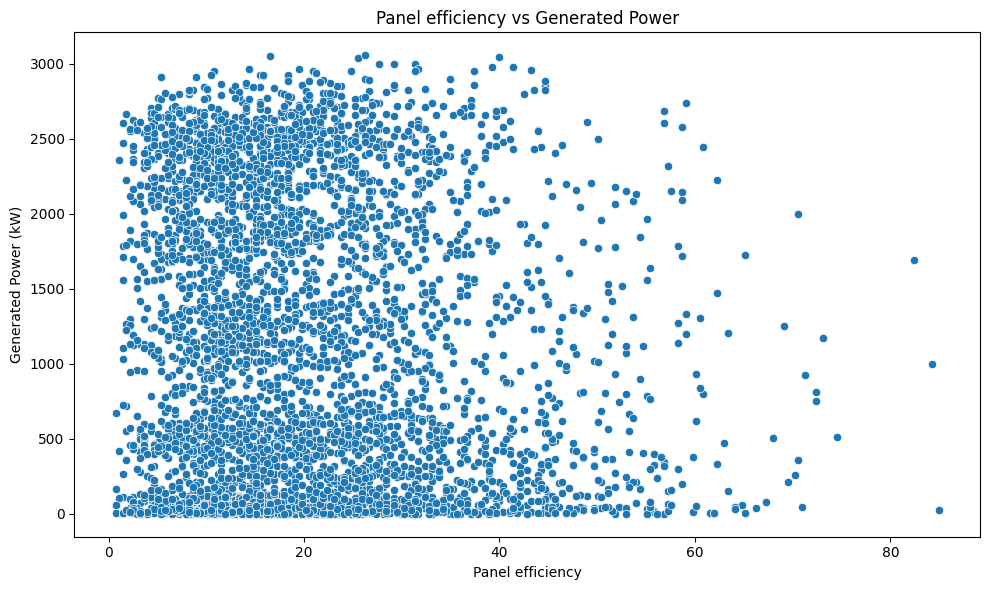

In [26]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x=df['panel_efficiency'], y=df['generated_power_kw'])
plt.title('Panel efficiency vs Generated Power')
plt.xlabel('Panel efficiency')
plt.ylabel('Generated Power (kW)')
save_fig("Panel efficiency vs Generated Power")
plt.show()

## Scatter plot between Angle of incidence and Generated Power Kw

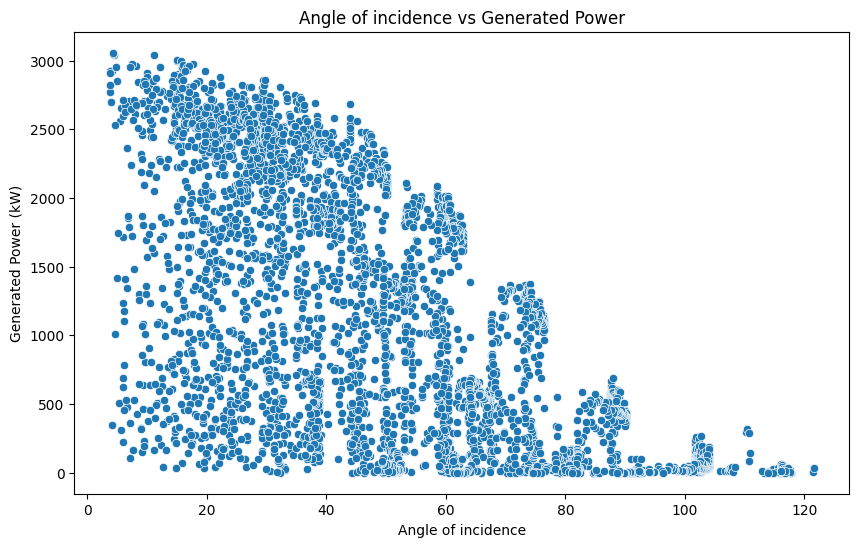

In [27]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x=df['angle_of_incidence'], y=df['generated_power_kw'])
plt.title('Angle of incidence vs Generated Power')
plt.xlabel('Angle of incidence')
plt.ylabel('Generated Power (kW)')
plt.show()

## Scatter plot between Panel Area and Generated Power Kw

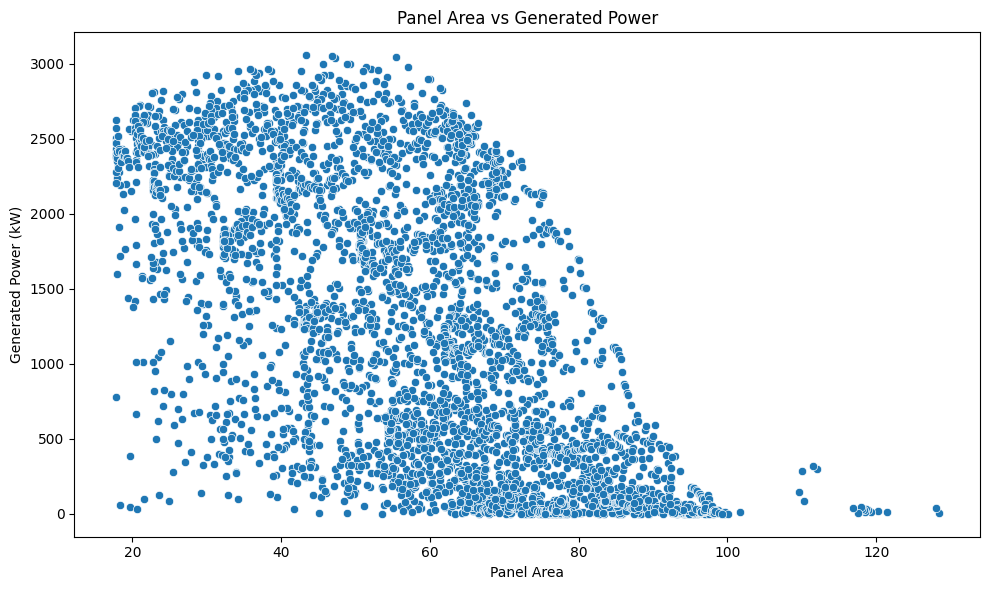

In [28]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x=df['panel_area'], y=df['generated_power_kw'])
plt.title('Panel Area vs Generated Power')
plt.xlabel('Panel Area')
plt.ylabel('Generated Power (kW)')
save_fig("Panel Area vs Generated Power")
plt.show()

## Scatter plot between Azimuth and Generated Power Kw

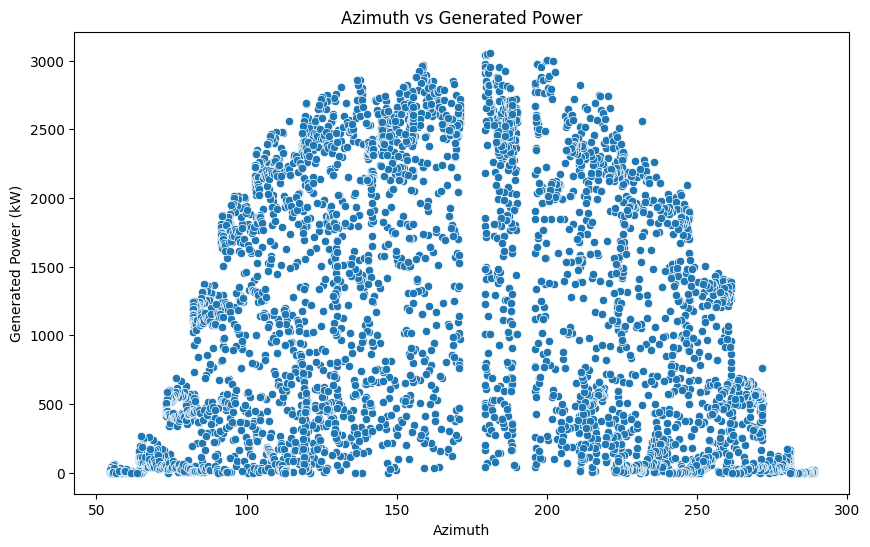

In [29]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x=df['azimuth'], y=df['generated_power_kw'])
plt.title('Azimuth vs Generated Power')
plt.xlabel('Azimuth')
plt.ylabel('Generated Power (kW)')
plt.show()

## Find most important features based on RandomForestRegressor

In [30]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split

In [31]:
from sklearn.preprocessing import StandardScaler

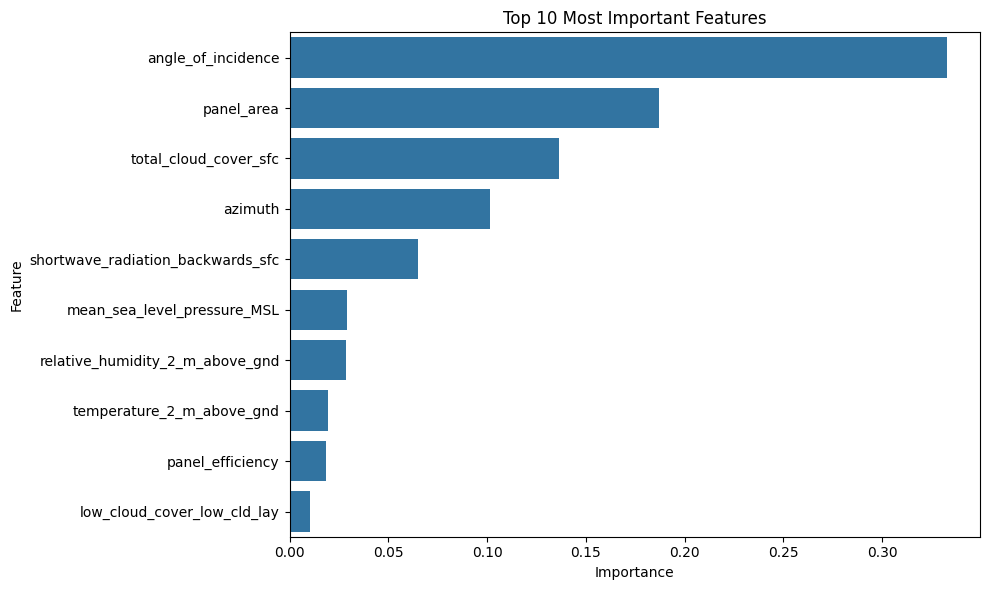

In [32]:
# Assuming 'generated_power_kw' is the target variable
X = df.drop('generated_power_kw', axis=1)
y = df['generated_power_kw']

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Apply normalization
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Train a Random Forest model on the normalized data
model = RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(X_train_scaled, y_train)

# Get feature importances
importances = model.feature_importances_
features = X.columns

# Create a DataFrame for visualization
importance_df = pd.DataFrame({'Feature': features, 'Importance': importances})
importance_df = importance_df.sort_values(by='Importance', ascending=False)

# Plot the top 10 most important features
plt.figure(figsize=(10, 6))
sns.barplot(x='Importance', y='Feature', data=importance_df.head(10))
plt.title('Top 10 Most Important Features')

save_fig("Top 10 Most Important Features Based On RandomRessor")
plt.show()

In [33]:
importance_df.head(10)

Feature  Importance
17                 angle_of_incidence    0.332839
18                         panel_area    0.186982
5               total_cloud_cover_sfc    0.136342
19                            azimuth    0.101585
9   shortwave_radiation_backwards_sfc    0.064823
2         mean_sea_level_pressure_MSL    0.029222
1     relative_humidity_2_m_above_gnd    0.028558
0           temperature_2_m_above_gnd    0.019643
16                   panel_efficiency    0.018387
8         low_cloud_cover_low_cld_lay    0.010352

## Most Important Feature(Using Correlation Matrix)

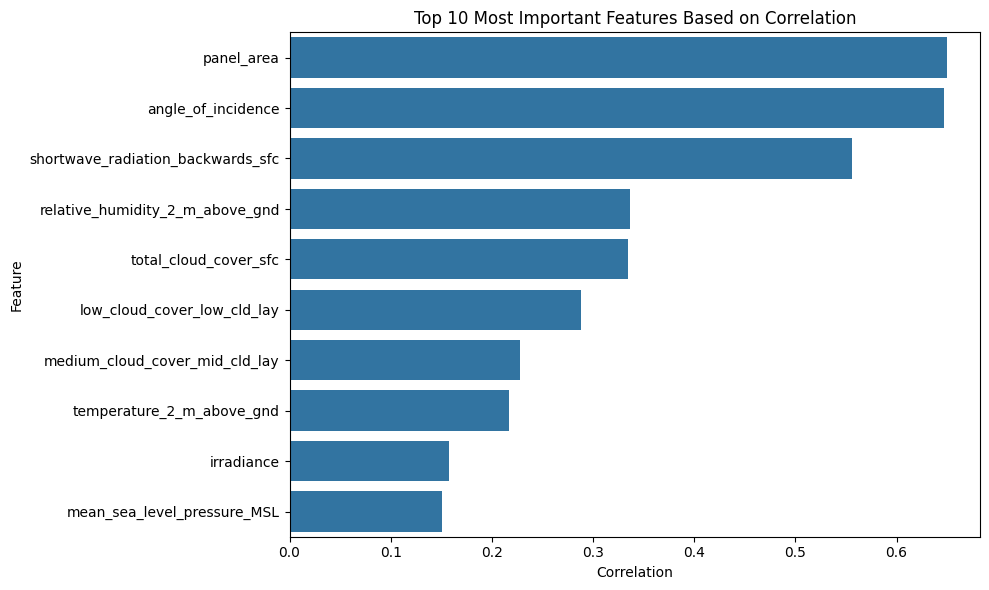

In [34]:
# Assuming 'generated_power_kw' is the target variable
target_variable = 'generated_power_kw'

# Calculate the correlation matrix
correlation_matrix = df.corr()

# Get correlation values for the target variable
correlation_with_target = correlation_matrix[target_variable].drop(target_variable)

# Create a DataFrame for visualization
importance_df = correlation_with_target.abs().sort_values(ascending=False).reset_index()
importance_df.columns = ['Feature', 'Correlation']

# Plot the top 10 most important features
plt.figure(figsize=(10, 6))
sns.barplot(x='Correlation', y='Feature', data=importance_df.head(10))
plt.title('Top 10 Most Important Features Based on Correlation')

save_fig("Top 10 Most Important Features Based on Correlation")
plt.show()

# Models Train

In [35]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.linear_model import LinearRegression
from sklearn.svm import SVR
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

In [36]:
#'generated_power_kw' is the target variable
target_variable = 'generated_power_kw'
features = df.drop(target_variable, axis=1)
target = df[target_variable]

In [37]:
scaler = StandardScaler()
features_scaled = scaler.fit_transform(features)

In [38]:
# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(features_scaled, target, test_size=0.2, random_state=42)

In [39]:
!pip install catboost

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 98.2/98.2 MB 8.1 MB/s eta 0:00:00


In [40]:
from catboost import CatBoostRegressor

In [41]:
def TransformResult(performance):
  # Extract MSE and MAE columns for normalization
  performance_df = pd.DataFrame(performance).T
  mse_min = performance_df['MSE'].min()
  mse_max = performance_df['MSE'].max()
  mae_min = performance_df['MAE'].min()
  mae_max = performance_df['MAE'].max()

  # Apply min-max normalization
  performance_df['MSE'] = (performance_df['MSE'] - mse_min) / (mse_max - mse_min)
  performance_df['MAE'] = (performance_df['MAE'] - mae_min) / (mae_max - mae_min)

  # Return df
  return performance_df

In [42]:
models = {
    'Linear Regression': LinearRegression(),
    'Random Forest Regressor': RandomForestRegressor(n_estimators=100, random_state=42),
    'Support Vector Regressor': SVR(),
    'Gradient Boosting': GradientBoostingRegressor(n_estimators=100, random_state=42),
    'K-Neighbors': KNeighborsRegressor(n_neighbors=5),
    'CatBoostRegressor': CatBoostRegressor(iterations=100, learning_rate=0.1,verbose=False, depth=6, loss_function='RMSE', random_state=42)
}

# Dictionary to store model performance
performance = {}

for model_name, model in models.items():
    # Train the model
    model.fit(X_train, y_train)

    # Predict on the test set
    y_pred = model.predict(X_test)

    # Evaluate the model
    mse = mean_squared_error(y_test, y_pred)
    mae = mean_absolute_error(y_test, y_pred)

    # Store performance
    performance[model_name] = {'MSE': mse, 'MAE': mae}

results_df = TransformResult(performance)
print(results_df)

                               MSE       MAE
Linear Regression         0.155032  0.266655
Random Forest Regressor   0.000000  0.000000
Support Vector Regressor  1.000000  1.000000
Gradient Boosting         0.024038  0.060821
K-Neighbors               0.123471  0.148265
CatBoostRegressor         0.012205  0.037256


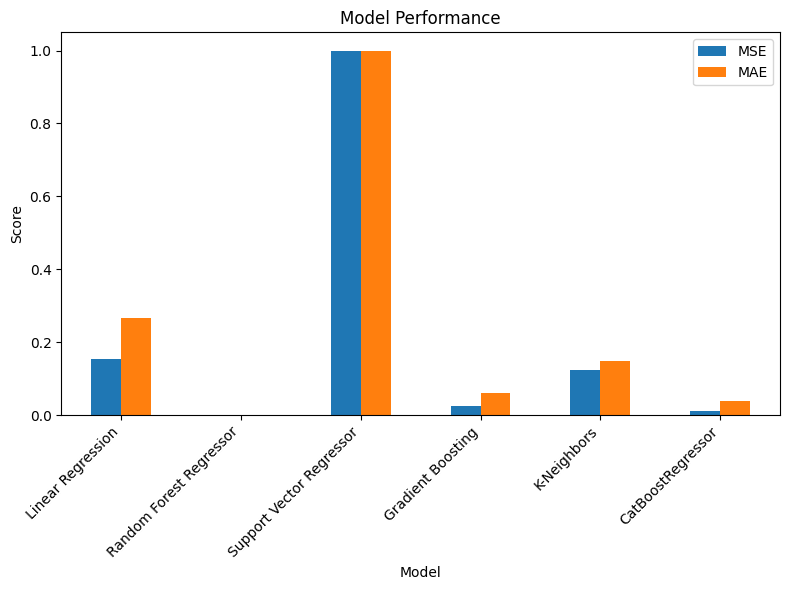

In [43]:
# Plot all mse mae and r2 score of models
results_df.plot(kind='bar', figsize=(8, 6))
plt.title('Model Performance')
plt.xlabel('Model')
plt.ylabel('Score')
plt.xticks(rotation=45, ha='right')
save_fig("Model Training Performance")
plt.show()

## K-Fold Cross Validation

In [44]:
from sklearn.metrics import make_scorer, mean_squared_error, mean_absolute_error
from sklearn.model_selection import train_test_split, cross_val_score

In [45]:
# Define the models
models = {
    'Random Forest': RandomForestRegressor(n_estimators=100, random_state=42),
    'Gradient Boosting': GradientBoostingRegressor(n_estimators=100, random_state=42),
    'K-Neighbors': KNeighborsRegressor(n_neighbors=5),
    'Support Vector Regressor': SVR(),
    'Linear Regression': LinearRegression(),
    'CatBoostRegressor': CatBoostRegressor(iterations=100, verbose=False,learning_rate=0.1, depth=6, loss_function='RMSE', random_state=42)
}

# Define a custom scorer to calculate MSE, MAE
scorers = {
    'MSE': make_scorer(mean_squared_error, greater_is_better=False),
    'MAE': make_scorer(mean_absolute_error, greater_is_better=False),
}

# Function to perform cross-validation
def cross_validate_models(models, X, y, cv=5):
    results = {}
    for name, model in models.items():
        results[name] = {}
        for scorer_name, scorer in scorers.items():
            score = cross_val_score(model, X, y, cv=cv, scoring=scorer)
            results[name][scorer_name] = -score.mean() if 'MSE' in scorer_name or 'MAE' in scorer_name else score.mean()
    return results

# Perform cross-validation
results = cross_validate_models(models, features_scaled, target, cv=5)
# Display the results
results_df = TransformResult(results)
print(results_df)

                               MSE       MAE
Random Forest             0.049296  0.027473
Gradient Boosting         0.035595  0.024956
K-Neighbors               0.102956  0.086138
Support Vector Regressor  1.000000  1.000000
Linear Regression         0.110858  0.141143
CatBoostRegressor         0.000000  0.000000


## Hyperparameter Tuning

In [46]:
from sklearn.model_selection import GridSearchCV

In [47]:
# Define the models and their hyperparameters
param_grid = {
    'Random Forest': {
        'model': RandomForestRegressor(random_state=42),
        'params': {
            'n_estimators': [50, 100, 200],
            'max_features': ['auto', 'sqrt', 'log2'],
            'max_depth': [None, 10, 20, 30]
        }
    },
    'Gradient Boosting': {
        'model': GradientBoostingRegressor(random_state=42),
        'params': {
            'n_estimators': [50, 100, 200],
            'learning_rate': [0.01, 0.1, 0.2],
            'max_depth': [3, 5, 7]
        }
    },
    'K-Neighbors': {
        'model': KNeighborsRegressor(),
        'params': {
            'n_neighbors': [3, 5, 7, 9],
            'weights': ['uniform', 'distance'],
            'algorithm': ['auto', 'ball_tree', 'kd_tree', 'brute']
        }
    },
    'Support Vector Regressor': {
        'model': SVR(),
        'params': {
            'kernel': ['linear', 'poly', 'rbf', 'sigmoid'],
            'C': [0.1, 1, 10],
            'epsilon': [0.1, 0.2, 0.5]
        }
    },
    'Linear Regression': {
        'model': LinearRegression(),
        'params': {
            'fit_intercept': [True, False],
        }
    },
    'CatBoostRegressor':{
        'model': CatBoostRegressor(random_state=42,verbose=False),
        'params': {
            'iterations': [100, 200, 300],
            'learning_rate': [0.01, 0.1, 0.2],
            'depth': [4, 6, 8]
    }
}
}

# Perform GridSearchCV for each model
best_models = {}
for name, model_info in param_grid.items():
    grid_search = GridSearchCV(model_info['model'], model_info['params'], cv=5, scoring='r2', n_jobs=-1)
    grid_search.fit(X_train, y_train)
    best_models[name] = grid_search.best_estimator_
    print(f"Best parameters for {name}: {grid_search.best_params_}")

# Evaluate the best models
results = {}
for name, model in best_models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    mse = mean_squared_error(y_test, y_pred)
    mae = mean_absolute_error(y_test, y_pred)
    results[name] = {'MSE': mse, 'MAE': mae}

Best parameters for Random Forest: {'max_depth': 20, 'max_features': 'sqrt', 'n_estimators': 200}
Best parameters for Gradient Boosting: {'learning_rate': 0.1, 'max_depth': 7, 'n_estimators': 200}
Best parameters for K-Neighbors: {'algorithm': 'auto', 'n_neighbors': 7, 'weights': 'distance'}
Best parameters for Support Vector Regressor: {'C': 10, 'epsilon': 0.5, 'kernel': 'linear'}
Best parameters for Linear Regression: {'fit_intercept': True}
Best parameters for CatBoostRegressor: {'depth': 8, 'iterations': 300, 'learning_rate': 0.1}


In [48]:
# Display the results
results_df = TransformResult(results)
print(results_df)

                               MSE       MAE
Random Forest             0.048085  0.148474
Gradient Boosting         0.076384  0.000000
K-Neighbors               0.595918  0.526512
Support Vector Regressor  1.000000  0.944024
Linear Regression         0.950576  1.000000
CatBoostRegressor         0.000000  0.038685


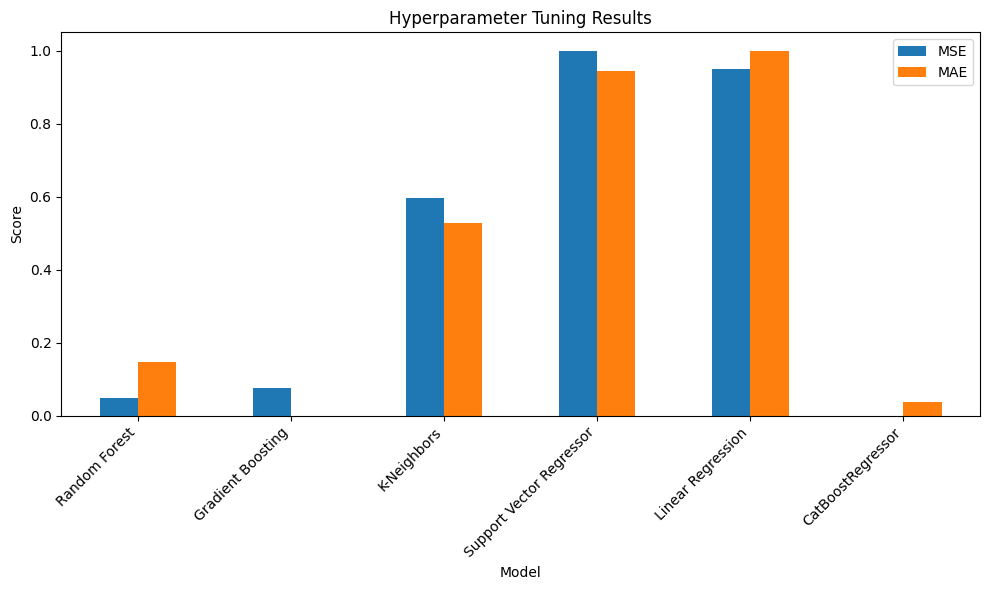

In [49]:
# Plot all the mse mae and r2 of Hyperparameter tuning
results_df.plot(kind='bar', figsize=(10, 6))
plt.title('Hyperparameter Tuning Results')
plt.xlabel('Model')
plt.ylabel('Score')
plt.xticks(rotation=45, ha='right')
save_fig("Hyperparameter Tuning Results")
plt.show()

# After Removing Outliers

In [50]:
# Load the dataset
df = pd.read_csv("solar_power.csv")

In [51]:
# Function to remove outliers based on IQR
def remove_outliers(df):
    Q1 = df.quantile(0.25)
    Q3 = df.quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    return df[~((df < lower_bound) | (df > upper_bound)).any(axis=1)]

# Remove outliers from the dataset
data_cleaned = remove_outliers(df)

# Display the number of rows before and after removing outliers
print(f"Original dataset shape: {df.shape}")
print(f"Dataset shape after removing outliers: {data_cleaned.shape}")

Original dataset shape: (4213, 21)
Dataset shape after removing outliers: (2362, 21)


In [52]:
#'generated_power_kw' is the target variable
target_variable = 'generated_power_kw'
features = df.drop(target_variable, axis=1)
target = df[target_variable]

In [53]:
scaler = StandardScaler()
features_scaled = scaler.fit_transform(features)

In [54]:
# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(features_scaled, target, test_size=0.2, random_state=42)

## Model Train

In [55]:
# Define the models
models = {
    'Random Forest': RandomForestRegressor(n_estimators=100, random_state=42),
    'Gradient Boosting': GradientBoostingRegressor(n_estimators=100, random_state=42),
    'K-Neighbors': KNeighborsRegressor(n_neighbors=5),
    'Support Vector Regressor': SVR(),
    'Linear Regression': LinearRegression(),
    'CatBoostRegressor': CatBoostRegressor(iterations=100, learning_rate=0.1,verbose=False, depth=6, loss_function='RMSE', random_state=42)
}

# Define a custom scorer to calculate MSE, MAE, and R2 score
scorers = {
    'MSE': make_scorer(mean_squared_error, greater_is_better=False),
    'MAE': make_scorer(mean_absolute_error, greater_is_better=False),
}

# Function to perform cross-validation
def cross_validate_models(models, X, y, cv=5):
    results = {}
    for name, model in models.items():
        results[name] = {}
        for scorer_name, scorer in scorers.items():
            score = cross_val_score(model, X, y, cv=cv, scoring=scorer)
            results[name][scorer_name] = -score.mean() if 'MSE' in scorer_name or 'MAE' in scorer_name else score.mean()
    return results

# Perform cross-validation
results = cross_validate_models(models, features_scaled, target, cv=5)

# Display the results
results_df = TransformResult(results)
print(results_df)

                               MSE       MAE
Random Forest             0.049296  0.027473
Gradient Boosting         0.035595  0.024956
K-Neighbors               0.102956  0.086138
Support Vector Regressor  1.000000  1.000000
Linear Regression         0.110858  0.141143
CatBoostRegressor         0.000000  0.000000


## Hyperparameter Tuning

In [56]:
from sklearn.model_selection import GridSearchCV

In [57]:
# Define the models and their hyperparameters
param_grid = {
    'Random Forest': {
        'model': RandomForestRegressor(random_state=42),
        'params': {
            'n_estimators': [50, 100, 200],
            'max_features': ['auto', 'sqrt', 'log2'],
            'max_depth': [None, 10, 20, 30]
        }
    },
    'Gradient Boosting': {
        'model': GradientBoostingRegressor(random_state=42),
        'params': {
            'n_estimators': [50, 100, 200],
            'learning_rate': [0.01, 0.1, 0.2],
            'max_depth': [3, 5, 7]
        }
    },
    'K-Neighbors': {
        'model': KNeighborsRegressor(),
        'params': {
            'n_neighbors': [3, 5, 7, 9],
            'weights': ['uniform', 'distance'],
            'algorithm': ['auto', 'ball_tree', 'kd_tree', 'brute']
        }
    },
    'Support Vector Regressor': {
        'model': SVR(),
        'params': {
            'kernel': ['linear', 'poly', 'rbf', 'sigmoid'],
            'C': [0.1, 1, 10],
            'epsilon': [0.1, 0.2, 0.5]
        }
    },
    'Linear Regression': {
        'model': LinearRegression(),
        'params': {
            'fit_intercept': [True, False],
        }
    },
    'CatBoostRegressor':{
        'model': CatBoostRegressor(random_state=42,verbose=False),
        'params': {
            'iterations': [100, 200, 300],
            'learning_rate': [0.01, 0.1, 0.2],
            'depth': [4, 6, 8]
    }
}
}

# Perform GridSearchCV for each model
best_models = {}
for name, model_info in param_grid.items():
    grid_search = GridSearchCV(model_info['model'], model_info['params'], cv=5, scoring='r2', n_jobs=-1)
    grid_search.fit(X_train, y_train)
    best_models[name] = grid_search.best_estimator_
    print(f"Best parameters for {name}: {grid_search.best_params_}")

# Evaluate the best models
results = {}
for name, model in best_models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    mse = mean_squared_error(y_test, y_pred)
    mae = mean_absolute_error(y_test, y_pred)
    results[name] = {'MSE': mse, 'MAE': mae}

Best parameters for Random Forest: {'max_depth': 20, 'max_features': 'sqrt', 'n_estimators': 200}
Best parameters for Gradient Boosting: {'learning_rate': 0.1, 'max_depth': 7, 'n_estimators': 200}
Best parameters for K-Neighbors: {'algorithm': 'auto', 'n_neighbors': 7, 'weights': 'distance'}
Best parameters for Support Vector Regressor: {'C': 10, 'epsilon': 0.5, 'kernel': 'linear'}
Best parameters for Linear Regression: {'fit_intercept': True}
Best parameters for CatBoostRegressor: {'depth': 8, 'iterations': 300, 'learning_rate': 0.1}


In [58]:
# Display the results
results_df = TransformResult(results)
print(results_df)

                               MSE       MAE
Random Forest             0.048085  0.148474
Gradient Boosting         0.076384  0.000000
K-Neighbors               0.595918  0.526512
Support Vector Regressor  1.000000  0.944024
Linear Regression         0.950576  1.000000
CatBoostRegressor         0.000000  0.038685
